### **Taller 3 - Morfología Matemática**

#### **Integrantes**

- Oscar Leonardo Riveros Perez

- Yovany Esneider Vargas Gutierrez

**1. Funciones para imágenes binarias**

**a. Implementación del algoritmo de adelgazamiento y su variante simétrica**

In [291]:
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

Los grises corresponden a los valores de -1 en el elemento estructurante.


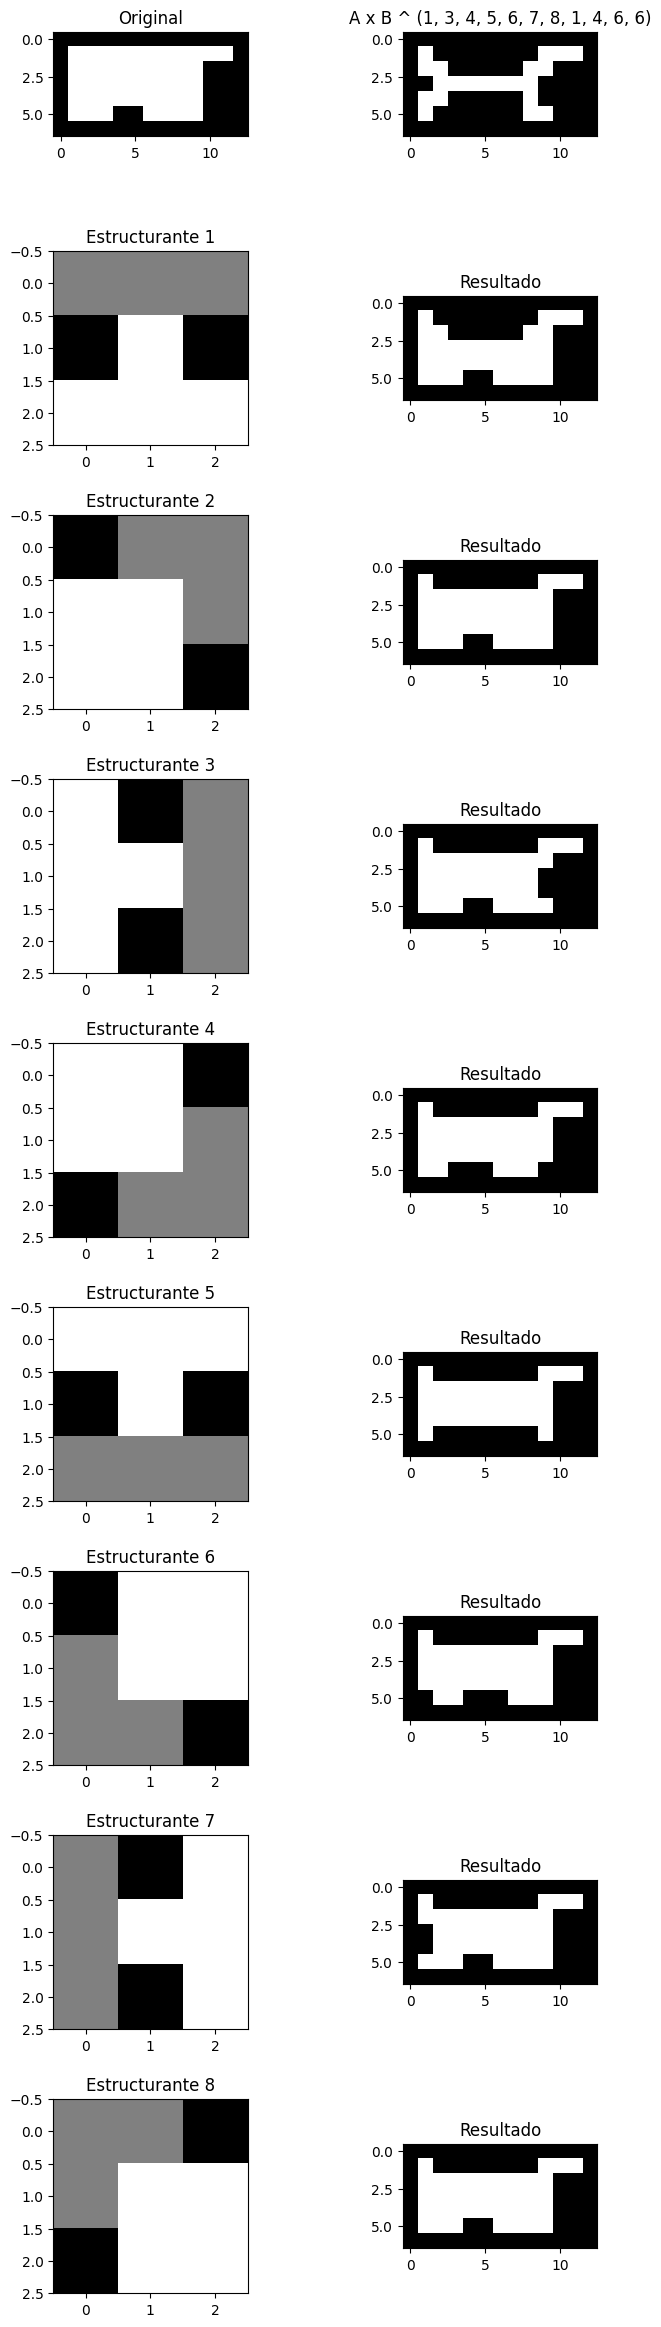

In [292]:
def Adelgazamiento(Img, Estructure):
    Hit_Miss = cv2.morphologyEx(Img,cv2.MORPH_HITMISS, Estructure)
    return (Img-Hit_Miss)

def Adelgazamiento_Multiple(Imagen,Array):

    result = Adelgazamiento(Imagen,Array[0])
    for i in Array[1:]:
        result = Adelgazamiento(result,i)

    return result

test = np.array(([0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,1,1,1,1,1,1,1,1,1,1,1,0],
                [0,1,1,1,1,1,1,1,1,1,0,0,0],
                [0,1,1,1,1,1,1,1,1,1,0,0,0],
                [0,1,1,1,1,1,1,1,1,1,0,0,0],
                [0,1,1,1,0,0,1,1,1,1,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0]),dtype='uint8') * 255

Est_1 = np.array(([-1,-1,-1],
                  [0,1,0],
                  [1,1,1]), dtype = 'int')

Est_2 = np.array(([0,-1,-1],
                  [1,1,-1],
                  [1,1,0]), dtype = 'int')

Est_3 = np.array(([1,0,-1],
                  [1,1,-1],
                  [1,0,-1]), dtype ='int')

Est_4 = np.array(([1,1,0],
                  [1,1,-1],
                  [0,-1,-1]), dtype ='int')

Est_5 = np.array(([1,1,1],
                  [0,1,0],
                  [-1,-1,-1]), dtype = 'int')

Est_6 = np.array(([0,1,1],
                  [-1,1,1],
                  [-1,-1,0]), dtype = 'int')

Est_7 = np.array(([-1,0,1],
                  [-1,1,1],
                  [-1,0,1]), dtype = 'int')

Est_8 = np.array(([-1,-1,0],
                  [-1,1,1],
                  [0,1,1]), dtype = 'int')

ArrayStru = [Est_1, Est_2, Est_3, Est_4, Est_5, Est_6, Est_7, Est_8]

print('Los grises corresponden a los valores de -1 en el elemento estructurante.')

ArrayStruS = [Est_1,Est_3,Est_4,Est_5,Est_6,Est_7,Est_8,Est_1,Est_4,Est_6,Est_6]
AdelSi = Adelgazamiento_Multiple(test, ArrayStruS)

plt.figure(1)
plt.subplot(9,2,1), plt.imshow(test, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(9,2,2), plt.imshow(AdelSi, cmap=plt.cm.gray), plt.title('A x B ^ (1, 3, 4, 5, 6, 7, 8, 1, 4, 6, 6)')

c = 1
c2 = 1
for Element in ArrayStru:
    result = Adelgazamiento(test,Array[0])
    result = Adelgazamiento(result,Element)
    result = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)
    plt.subplot(9,2,3 + c), plt.imshow(result), plt.title('Resultado')
    
    structure = np.array(([0,0,0], [0,0,0], [0,0,0]), dtype = 'uint8')
    for i in range(3):
        for j in range(3):
            number = Element[i,j]
            if number == -1:
                structure[i,j] = 128
            else:
                structure[i,j] = number*255
    structure = cv2.cvtColor(structure, cv2.COLOR_GRAY2BGR)
    plt.subplot(9,2,3 + c-1), plt.imshow(structure), plt.title('Estructurante ' + str(c2))
    c += 2
    c2 += 1

plt.subplots_adjust(top=5, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()


Si bien el elemento no tiene la misma secuencia de rotaciones, es posible llegar la mismo resultado con la combinación adecuada.

**b. Implementación del algoritmo de esqueleto**

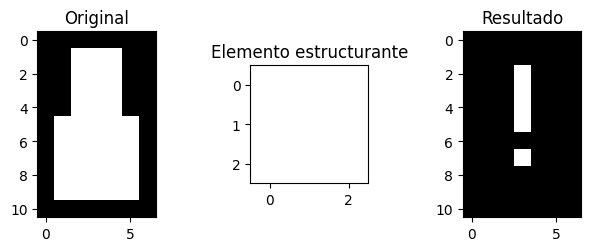

Con un K de 2


In [293]:
def Esqueleto(Img, Estructure):
    k = 0
    erosion = cv2.erode(Img,Estructure,1)
    sk = erosion - cv2.morphologyEx(erosion,cv2.MORPH_OPEN,Estructure)

    while np.mean(erosion) != 0:
        erosion = cv2.erode(erosion,Estructure,1)
        sk = sk + erosion - cv2.morphologyEx(erosion,cv2.MORPH_OPEN,Estructure)
        k += 1

    return [sk,k]

test=np.array(([0,0,0,0,0,0,0],
               [0,0,1,1,1,0,0],
               [0,0,1,1,1,0,0],
               [0,0,1,1,1,0,0],
               [0,0,1,1,1,0,0],
               [0,1,1,1,1,1,0],
               [0,1,1,1,1,1,0],
               [0,1,1,1,1,1,0],
               [0,1,1,1,1,1,0],
               [0,1,1,1,1,1,0],
               [0,0,0,0,0,0,0]),
               dtype='uint8')*255

Est_1 = np.array(([1,1,1],
                [1,1,1],
                [1,1,1]),
                dtype='uint8')*255

result = Esqueleto(test,Est_1)

Est_1 = cv2.cvtColor(Est_1, cv2.COLOR_GRAY2BGR)

plt.figure(1)
plt.subplot(1,3,1), plt.imshow(test, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(Est_1, cmap=plt.cm.gray), plt.title('Elemento estructurante')
plt.subplot(1,3,3), plt.imshow(result[0], cmap=plt.cm.gray), plt.title('Resultado')
plt.subplots_adjust(top=2, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()
print('Con un K de ' + str(result[1]))

**2.**

**a. Funciones vistas en el taller**

**Formas de Elemento Estructurante**

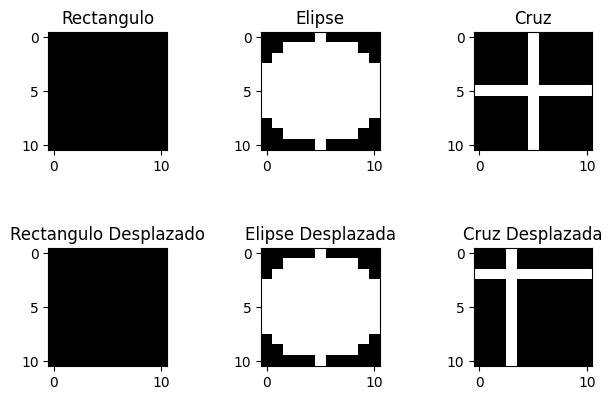

In [294]:
Rect_Center     =   cv2.getStructuringElement(cv2.MORPH_RECT, (11,11), (-1,-1))
Rect_Shift      =   cv2.getStructuringElement(cv2.MORPH_RECT, (11,11), (3,2))

Ellipse_Center  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11), (-1,-1))
Ellipse_Shift   =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11), (3,2))

Cross_Center    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (11,11), (-1,-1))
Cross_Shift     =   cv2.getStructuringElement(cv2.MORPH_CROSS, (11,11), (3,2))

plt.figure(1)
plt.subplot(231), plt.imshow(Rect_Center, cmap=plt.cm.gray), plt.title('Rectangulo')
plt.subplot(234), plt.imshow(Rect_Shift, cmap=plt.cm.gray), plt.title('Rectangulo Desplazado')
plt.subplot(232), plt.imshow(Ellipse_Center, cmap=plt.cm.gray), plt.title('Elipse')
plt.subplot(235), plt.imshow(Ellipse_Shift, cmap=plt.cm.gray), plt.title('Elipse Desplazada')
plt.subplot(233), plt.imshow(Cross_Center, cmap=plt.cm.gray), plt.title('Cruz')
plt.subplot(236), plt.imshow(Cross_Shift, cmap=plt.cm.gray), plt.title('Cruz Desplazada')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

La elipse y el rectángulo no presentan variaciones con el desplazamiento debido a que la definición del centro sólo regula cuánto se desplaza el resultado de la operación morfológica. Esto se observa en mayor medida cuando se utilizan en imágenes.

**Dilatación**

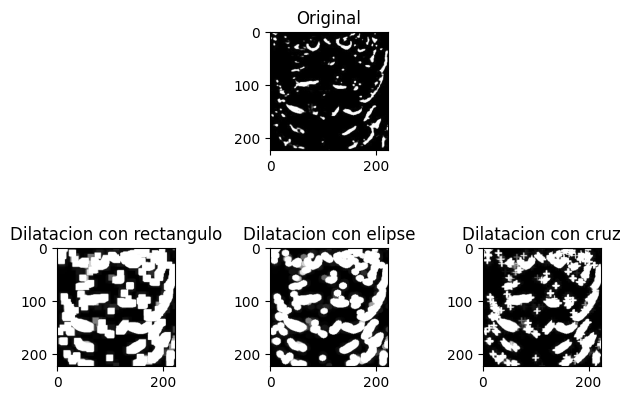

In [295]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (11,11), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (11,11), (-1,-1))


Test  =   cv2.imread('Images/Test.png',0)

Dilate_Rect      =   cv2.dilate(Test,Rect)
Dilate_Ellipse   =   cv2.dilate(Test,Ellipse)
Dilate_Cross     =   cv2.dilate(Test,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Dilate_Rect, cmap=plt.cm.gray), plt.title('Dilatacion con rectangulo')
plt.subplot(235), plt.imshow(Dilate_Ellipse, cmap=plt.cm.gray), plt.title('Dilatacion con elipse')
plt.subplot(236), plt.imshow(Dilate_Cross, cmap=plt.cm.gray), plt.title('Dilatacion con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

Es posible identificar el elemento estructurante utilizado en la dilatación, con el aspecto del resultado final en cada caso.

**Erosion**

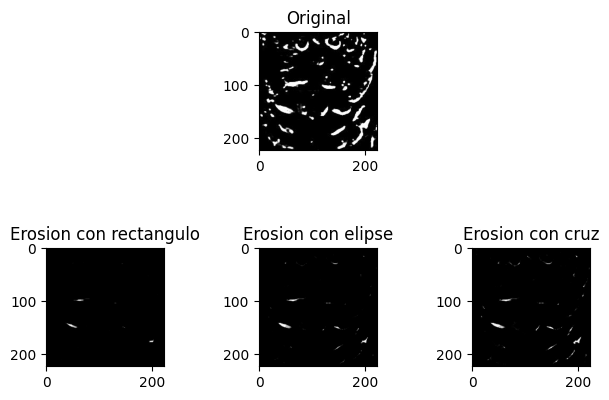

In [296]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (7,7), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7), (-1,-1))


Test  =   cv2.imread('Images/Test.png',0)

Erode_Rect      =   cv2.erode(Test,Rect)
Erode_Ellipse   =   cv2.erode(Test,Ellipse)
Erode_Cross     =   cv2.erode(Test,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Erode_Rect, cmap=plt.cm.gray), plt.title('Erosion con rectangulo')
plt.subplot(235), plt.imshow(Erode_Ellipse, cmap=plt.cm.gray), plt.title('Erosion con elipse')
plt.subplot(236), plt.imshow(Erode_Cross, cmap=plt.cm.gray), plt.title('Erosion con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

Utilizando el elemento estructurante rectángulo, debido a su geometría abarca mayor area y por tanto elimina con mayor rigurosidad. A diferencia de los otros 2 elementos, donde la cruz al presentar la menor de las areas es más flexible en la reducción de ruido.

**Apertura**

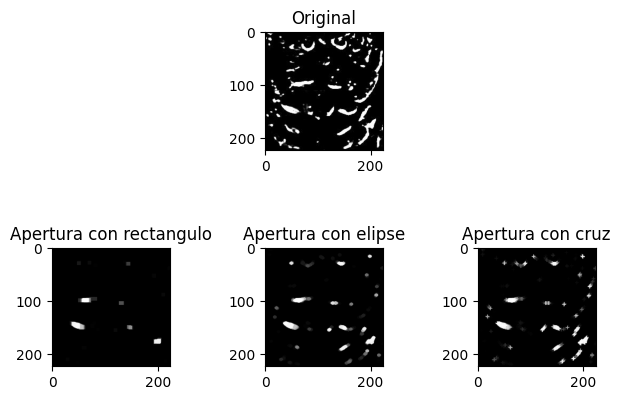

In [297]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (7,7), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7), (-1,-1))


Test  =   cv2.imread('Images/Test.png',0)

Open_Rect      =   cv2.morphologyEx(Test,cv2.MORPH_OPEN,Rect)
Open_Ellipse   =   cv2.morphologyEx(Test,cv2.MORPH_OPEN,Ellipse)
Open_Cross     =   cv2.morphologyEx(Test,cv2.MORPH_OPEN,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Open_Rect, cmap=plt.cm.gray), plt.title('Apertura con rectangulo')
plt.subplot(235), plt.imshow(Open_Ellipse, cmap=plt.cm.gray), plt.title('Apertura con elipse')
plt.subplot(236), plt.imshow(Open_Cross, cmap=plt.cm.gray), plt.title('Apertura con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

Se observa el mismo comportamiento que en el inciso anterior.

**Cierre**

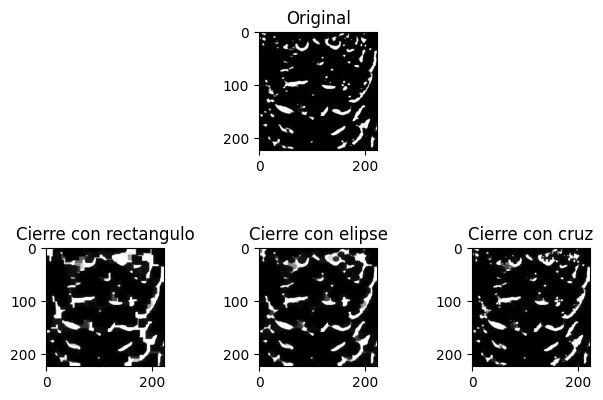

In [298]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (11,11), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (11,11), (-1,-1))


Test  =   cv2.imread('Images/Test.png',0)

Close_Rect      =   cv2.morphologyEx(Test,cv2.MORPH_CLOSE,Rect)
Close_Ellipse   =   cv2.morphologyEx(Test,cv2.MORPH_CLOSE,Ellipse)
Close_Cross     =   cv2.morphologyEx(Test,cv2.MORPH_CLOSE,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Close_Rect, cmap=plt.cm.gray), plt.title('Cierre con rectangulo')
plt.subplot(235), plt.imshow(Close_Ellipse, cmap=plt.cm.gray), plt.title('Cierre con elipse')
plt.subplot(236), plt.imshow(Close_Cross, cmap=plt.cm.gray), plt.title('Cierre con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

Aunque es similar el resultado en los tres casos, nuevamente el area que abarca cada elemento estructurante aumenta el tamaño de las nuevas areas resultantes.

**Gradiente**

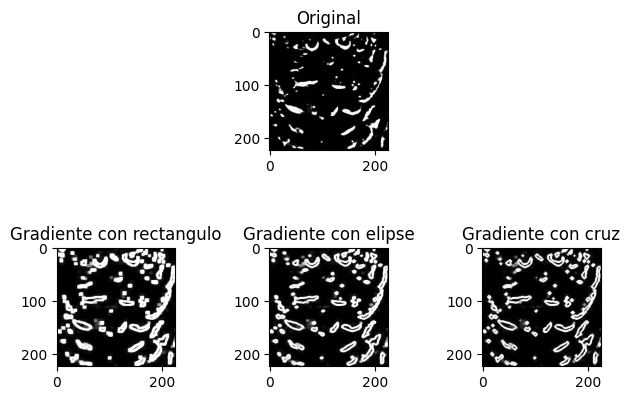

In [299]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (5,5), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5), (-1,-1))


Test  =   cv2.imread('Images/Test.png',0)

Gradient_Rect      =   cv2.morphologyEx(Test,cv2.MORPH_GRADIENT,Rect)
Gradient_Ellipse   =   cv2.morphologyEx(Test,cv2.MORPH_GRADIENT,Ellipse)
Gradient_Cross     =   cv2.morphologyEx(Test,cv2.MORPH_GRADIENT,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Gradient_Rect, cmap=plt.cm.gray), plt.title('Gradiente con rectangulo')
plt.subplot(235), plt.imshow(Gradient_Ellipse, cmap=plt.cm.gray), plt.title('Gradiente con elipse')
plt.subplot(236), plt.imshow(Gradient_Cross, cmap=plt.cm.gray), plt.title('Gradiente con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

Se observa el mismo comportamiento que en incisos anteriores. Donde debido a la forma del elemento estructurante el resultado cambia de aspecto.

**TopHat**

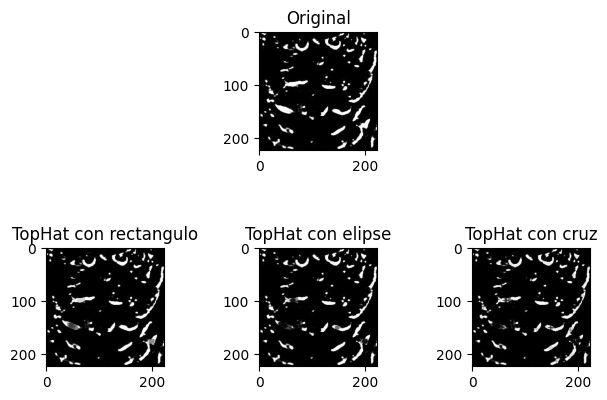

In [300]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (9,9), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (9,9), (-1,-1))


Test  =   cv2.imread('Images/Test.png',0)

TopHat_Rect      =   cv2.morphologyEx(Test,cv2.MORPH_TOPHAT,Rect)
TopHat_Ellipse   =   cv2.morphologyEx(Test,cv2.MORPH_TOPHAT,Ellipse)
TopHat_Cross     =   cv2.morphologyEx(Test,cv2.MORPH_TOPHAT,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(TopHat_Rect, cmap=plt.cm.gray), plt.title('TopHat con rectangulo')
plt.subplot(235), plt.imshow(TopHat_Ellipse, cmap=plt.cm.gray), plt.title('TopHat con elipse')
plt.subplot(236), plt.imshow(TopHat_Cross, cmap=plt.cm.gray), plt.title('TopHat con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

Se observa el mismo comportamiento que en incisos anteriores. Donde debido a la forma del elemento estructurante el resultado cambia de aspecto.

**BlackHat**

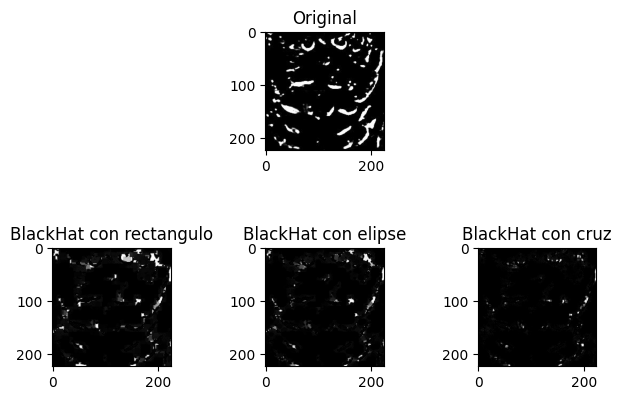

In [301]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (9,9), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (9,9), (-1,-1))


Test  =   cv2.imread('Images/Test.png',0)

BlackHat_Rect      =   cv2.morphologyEx(Test,cv2.MORPH_BLACKHAT,Rect)
BlackHat_Ellipse   =   cv2.morphologyEx(Test,cv2.MORPH_BLACKHAT,Ellipse)
BlackHat_Cross     =   cv2.morphologyEx(Test,cv2.MORPH_BLACKHAT,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(BlackHat_Rect, cmap=plt.cm.gray), plt.title('BlackHat con rectangulo')
plt.subplot(235), plt.imshow(BlackHat_Ellipse, cmap=plt.cm.gray), plt.title('BlackHat con elipse')
plt.subplot(236), plt.imshow(BlackHat_Cross, cmap=plt.cm.gray), plt.title('BlackHat con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

Se observa el mismo comportamiento que en incisos anteriores. Donde debido a la forma del elemento estructurante el se elimina más o menos información.

**Filtro Morfológico - Apertura/Cierre**

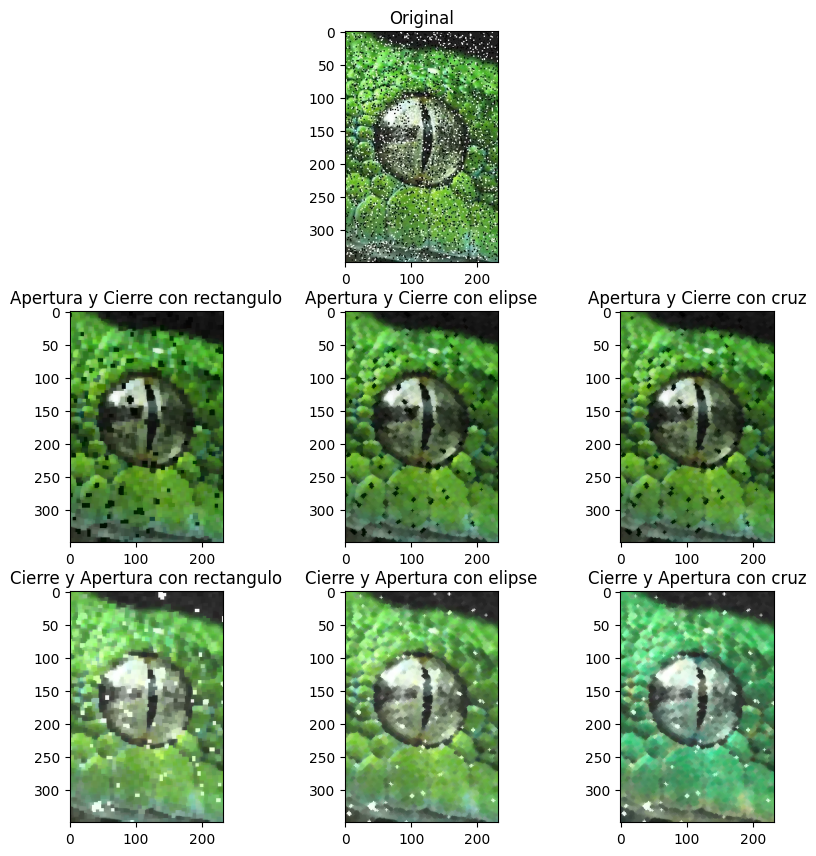

In [302]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (5,5), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5), (-1,-1))


Test  =   cv2.imread('Images/Salt_Pepper_2.png',1)
Test = Test[:,:,::-1]

Open_Close_Rect      =   cv2.morphologyEx(cv2.morphologyEx(Test,cv2.MORPH_OPEN,Rect),cv2.MORPH_CLOSE,Rect)
Open_Close_Ellipse   =   cv2.morphologyEx(cv2.morphologyEx(Test,cv2.MORPH_OPEN,Ellipse),cv2.MORPH_CLOSE,Cross)
Open_Close_Cross     =   cv2.morphologyEx(cv2.morphologyEx(Test,cv2.MORPH_OPEN,Ellipse),cv2.MORPH_CLOSE,Cross)

Close_Open_Rect      =   cv2.morphologyEx(cv2.morphologyEx(Test,cv2.MORPH_CLOSE,Rect),cv2.MORPH_OPEN,Rect)
Close_Open_Ellipse   =   cv2.morphologyEx(cv2.morphologyEx(Test,cv2.MORPH_CLOSE,Ellipse),cv2.MORPH_OPEN,Cross)
Close_Open_Cross     =   cv2.morphologyEx(cv2.morphologyEx(Test,cv2.MORPH_CLOSE,Ellipse),cv2.MORPH_OPEN,Cross)

plt.figure(1)
plt.subplot(332), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(334), plt.imshow(Open_Close_Rect, cmap=plt.cm.gray), plt.title('Apertura y Cierre con rectangulo')
plt.subplot(335), plt.imshow(Open_Close_Ellipse, cmap=plt.cm.gray), plt.title('Apertura y Cierre con elipse')
plt.subplot(336), plt.imshow(Open_Close_Cross, cmap=plt.cm.gray), plt.title('Apertura y Cierre con cruz')
plt.subplot(337), plt.imshow(Close_Open_Rect, cmap=plt.cm.gray), plt.title('Cierre y Apertura con rectangulo')
plt.subplot(338), plt.imshow(Close_Open_Ellipse, cmap=plt.cm.gray), plt.title('Cierre y Apertura con elipse')
plt.subplot(339), plt.imshow(Close_Open_Cross[:,:,::-1], cmap=plt.cm.gray), plt.title('Cierre y Apertura con cruz')

plt.subplots_adjust(top=1.8, bottom=0.05, left=0.10, right=1.2, hspace=0, wspace=0.8)
plt.show()

En primer lugar es evidente la NO conmutativa de las operaciones, debido a la erosión. Donde en la tercera fila se evidencia la perdida de información debido a efectuar el cierre en primera instancia. En lo que respecta al ruido sal y pimienta solo se sustrajo totalmente uno en cada caso, sin embargo, en la comparación respecto a la original es favorable.

**Dilatación - Color**

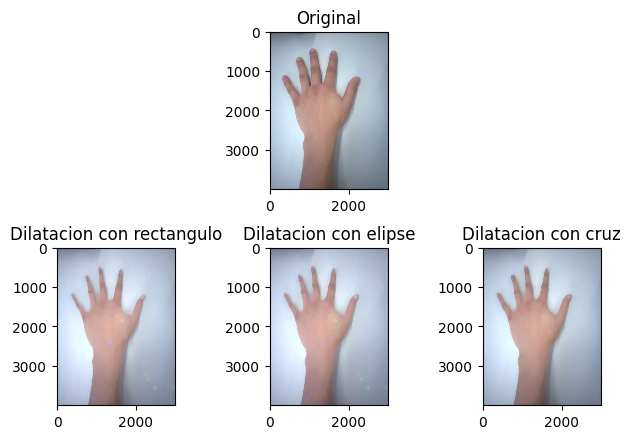

In [303]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (100,100), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100,100), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (100,100), (-1,-1))


Test  =   cv2.imread('Images/Img_Indoor_1.png',1)
Test = Test[:,:,::-1]

Dilate_Rect      =   cv2.dilate(Test,Rect)
Dilate_Ellipse   =   cv2.dilate(Test,Ellipse)
Dilate_Cross     =   cv2.dilate(Test,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Dilate_Rect, cmap=plt.cm.gray), plt.title('Dilatacion con rectangulo')
plt.subplot(235), plt.imshow(Dilate_Ellipse, cmap=plt.cm.gray), plt.title('Dilatacion con elipse')
plt.subplot(236), plt.imshow(Dilate_Cross, cmap=plt.cm.gray), plt.title('Dilatacion con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

Se obtienen resultados similares en los tres casos.

**Erosion - Color**

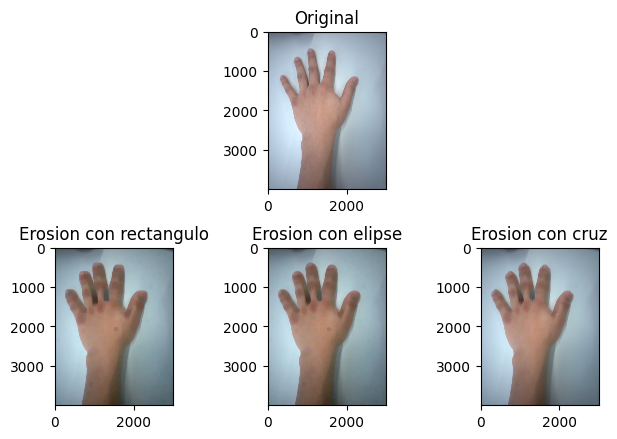

In [304]:
Rect     =   cv2.getStructuringElement(cv2.MORPH_RECT, (100,100), (-1,-1))
Ellipse  =   cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100,100), (-1,-1))
Cross    =   cv2.getStructuringElement(cv2.MORPH_CROSS, (100,100), (-1,-1))


Erode_Rect      =   cv2.erode(Test,Rect)
Erode_Ellipse   =   cv2.erode(Test,Ellipse)
Erode_Cross     =   cv2.erode(Test,Cross)

plt.figure(1)
plt.subplot(232), plt.imshow(Test, cmap=plt.cm.gray), plt.title('Original')

plt.subplot(234), plt.imshow(Erode_Rect, cmap=plt.cm.gray), plt.title('Erosion con rectangulo')
plt.subplot(235), plt.imshow(Erode_Ellipse, cmap=plt.cm.gray), plt.title('Erosion con elipse')
plt.subplot(236), plt.imshow(Erode_Cross, cmap=plt.cm.gray), plt.title('Erosion con cruz')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

Se observa una erosion más homogénea con los elementos estructurantes rectángulo y elipse. Esto se le atribuye al area que ocupan.

**b. Adelgazamiento y esqueleto en imágenes reales**

**Adelgazamiento**

Los grises corresponden a los valores de -1 en el elemento estructurante.


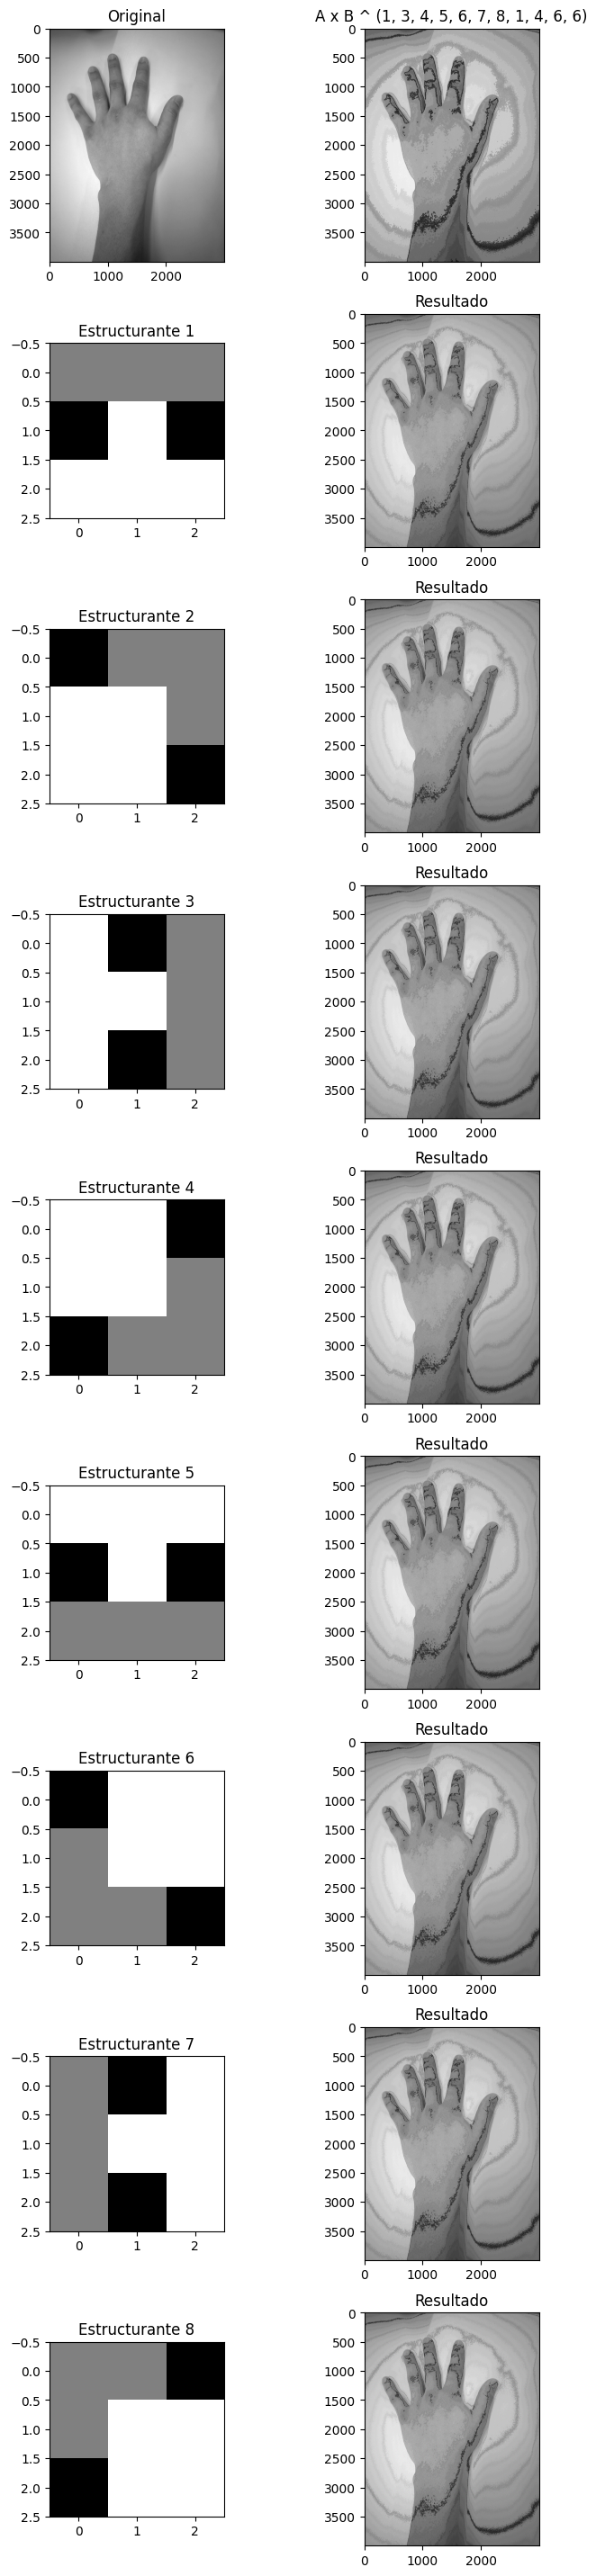

In [305]:
def lessBins(img, bins):
    q = 256/bins
    normalized_img = cv2.normalize(img, None, 0, bins-1, cv2.NORM_MINMAX)
    return(normalized_img)

test = cv2.imread('Images/Img_Indoor_1.png',0)
# test = lessBins(test, 2)

Est_1 = np.array(([-1,-1,-1],
                  [0,1,0],
                  [1,1,1]), dtype = 'int')

Est_2 = np.array(([0,-1,-1],
                  [1,1,-1],
                  [1,1,0]), dtype = 'int')

Est_3 = np.array(([1,0,-1],
                  [1,1,-1],
                  [1,0,-1]), dtype ='int')

Est_4 = np.array(([1,1,0],
                  [1,1,-1],
                  [0,-1,-1]), dtype ='int')

Est_5 = np.array(([1,1,1],
                  [0,1,0],
                  [-1,-1,-1]), dtype = 'int')

Est_6 = np.array(([0,1,1],
                  [-1,1,1],
                  [-1,-1,0]), dtype = 'int')

Est_7 = np.array(([-1,0,1],
                  [-1,1,1],
                  [-1,0,1]), dtype = 'int')

Est_8 = np.array(([-1,-1,0],
                  [-1,1,1],
                  [0,1,1]), dtype = 'int')

ArrayStru = [Est_1, Est_2, Est_3, Est_4, Est_5, Est_6, Est_7, Est_8]

print('Los grises corresponden a los valores de -1 en el elemento estructurante.')

ArrayStruS = [Est_1,Est_3,Est_4,Est_5,Est_6,Est_7,Est_8,Est_1,Est_4,Est_6,Est_6]
AdelSi = Adelgazamiento_Multiple(test, ArrayStruS)

plt.figure(1)
plt.subplot(9,2,1), plt.imshow(test, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(9,2,2), plt.imshow(AdelSi, cmap=plt.cm.gray), plt.title('A x B ^ (1, 3, 4, 5, 6, 7, 8, 1, 4, 6, 6)')

c = 1
c2 = 1
for Element in ArrayStru:
    result = Adelgazamiento(test,Array[0])
    result = Adelgazamiento(result,Element)
    result = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)
    plt.subplot(9,2,3 + c), plt.imshow(result), plt.title('Resultado')
    
    structure = np.array(([0,0,0], [0,0,0], [0,0,0]), dtype = 'uint8')
    for i in range(3):
        for j in range(3):
            number = Element[i,j]
            if number == -1:
                structure[i,j] = 128
            else:
                structure[i,j] = number*255
    structure = cv2.cvtColor(structure, cv2.COLOR_GRAY2BGR)
    plt.subplot(9,2,3 + c-1), plt.imshow(structure), plt.title('Estructurante ' + str(c2))
    c += 2
    c2 += 1

plt.subplots_adjust(top=6, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

No hay ningún aspecto a resaltar, más allá de que en las areas donde la existe similitud se incrementa la intensidad de sus bordes. Si bien la operación tiene un mejor desempeño en imágenes binarias, no lo presenta en este caso. Se maneja la hipótesis de que es debido al tamaño, al ser tan grande, la sustracción de la convolución es imperceptible.

**Esqueleto**

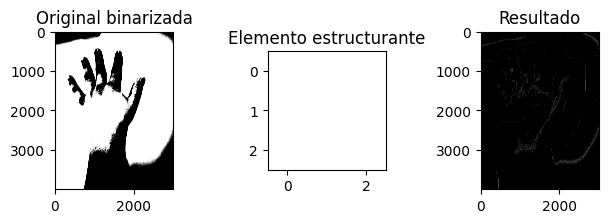

Con un K de 810


In [306]:
def Esqueleto(Img, Estructure):
    k = 0
    erosion = cv2.erode(Img,Estructure,1)
    sk = erosion - cv2.morphologyEx(erosion,cv2.MORPH_OPEN,Estructure)

    while np.mean(erosion) != 0:
        erosion = cv2.erode(erosion,Estructure,1)
        sk = sk + erosion - cv2.morphologyEx(erosion,cv2.MORPH_OPEN,Estructure)
        k += 1

    return [sk,k]

test  =   lessBins(test,2)

Est_1 = np.array(([1,1,1],
                [1,1,1],
                [1,1,1]),
                dtype='uint8')*255

result = Esqueleto(test,Est_1)

Est_1 = cv2.cvtColor(Est_1, cv2.COLOR_GRAY2BGR)

plt.figure(1)
plt.subplot(1,3,1), plt.imshow(test, cmap=plt.cm.gray), plt.title('Original binarizada')
plt.subplot(1,3,2), plt.imshow(Est_1, cmap=plt.cm.gray), plt.title('Elemento estructurante')
plt.subplot(1,3,3), plt.imshow(result[0], cmap=plt.cm.gray), plt.title('Resultado')
plt.subplots_adjust(top=2, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()
print('Con un K de ' + str(result[1]))

Es necesaria la binarización de la imagen, en este caso, se normaliza el histograma a 2 bins (0 y 1), permitiendo el correcto funcionamiento de la función esqueleto en imágenes binarias. Se obtiene el resultado espera, donde para su restauración son necesarias 810 dilataciones con el mismo elemento estructurante.